In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix

In [2]:
df=pd.read_csv("spam.csv")
df.sample(10)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1557,ham,Wat r u doing?,NaN,NaN,NaN
4614,spam,Sunshine Quiz! Win a super Sony DVD recorder i...,NaN,NaN,NaN
959,ham,Where @,NaN,NaN,NaN
451,ham,Thanks for this hope you had a good day today,NaN,NaN,NaN
1515,ham,I wonder if you'll get this text?,NaN,NaN,NaN
1205,ham,The whole car appreciated the last two! Dad an...,NaN,NaN,NaN
5281,ham,"And how you will do that, princess? :)",NaN,NaN,NaN
2755,ham,We r outside already.,NaN,NaN,NaN
4087,ham,He needs to stop going to bed and make with th...,NaN,NaN,NaN
2581,ham,Yup i'm elaborating on the safety aspects and ...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

1. ## DATA CLEANING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
4766,spam,Your unique user ID is 1172. For removal send ...
4425,ham,Was it something u ate?
3666,ham,Honey ? Sweetheart ? Darling ? Sexy buns ? Sug...
3503,ham,Will you be here for food
3268,ham,Raviyog Peripherals bhayandar east


In [6]:
df.rename(columns={'v1':'label','v2':'message'},inplace=True)
df.sample(5)

,label,message
366,spam,"Update_Now - Xmas Offer! Latest Motorola, Sony..."
4990,ham,We made it! Eta at taunton is 12:30 as planned...
5103,ham,In other news after hassling me to get him wee...
2977,ham,Yar lor... Keep raining non stop... Or u wan 2...
2495,spam,WINNER! As a valued network customer you hvae ...


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [8]:
df['label']=encoder.fit_transform(df['label'])
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [10]:
# check for the duplicate value
df.duplicated().sum()

np.int64(403)

In [11]:
# romoving duplicate
df=df.drop_duplicates(keep='first')
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [12]:
df.duplicated().sum()

np.int64(0)

# 2. Exploratory data analysis

In [13]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

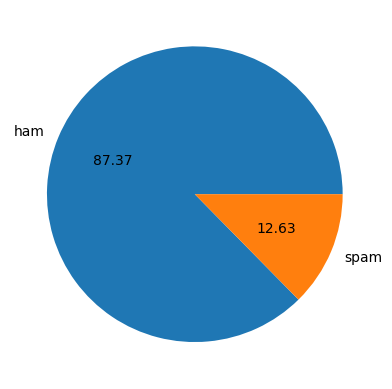

In [14]:
plt.pie(df['label'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [15]:
# Data is imbalanced

In [16]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [17]:
df['Num_character']=df['message'].apply(len)
df.head()

,label,message,Num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
df['Num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,label,message,Num_character,Num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [19]:
df['Num_sentences']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,label,message,Num_character,Num_words,Num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
df[['Num_character','Num_words','Num_sentences']].describe()

,Num_character,Num_words,Num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
#ham messsage
df[df['label']==0][['Num_character','Num_words','Num_sentences']].describe()

,Num_character,Num_words,Num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
#spam message
df[df['label']==1][['Num_character','Num_words','Num_sentences']].describe()

,Num_character,Num_words,Num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='Num_words', ylabel='Count'>

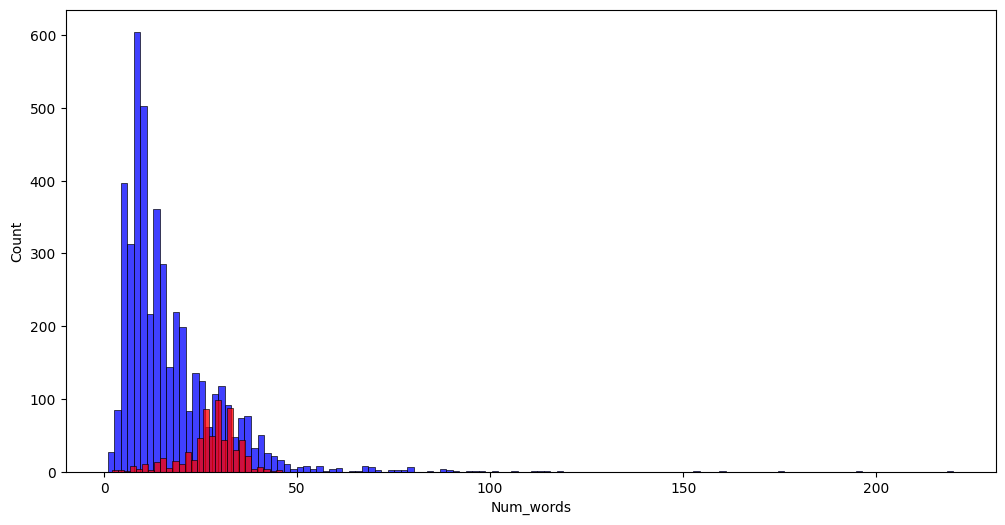

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label']==0]['Num_words'],color='blue')
sns.histplot(df[df['label']==1]['Num_words'],color='red')

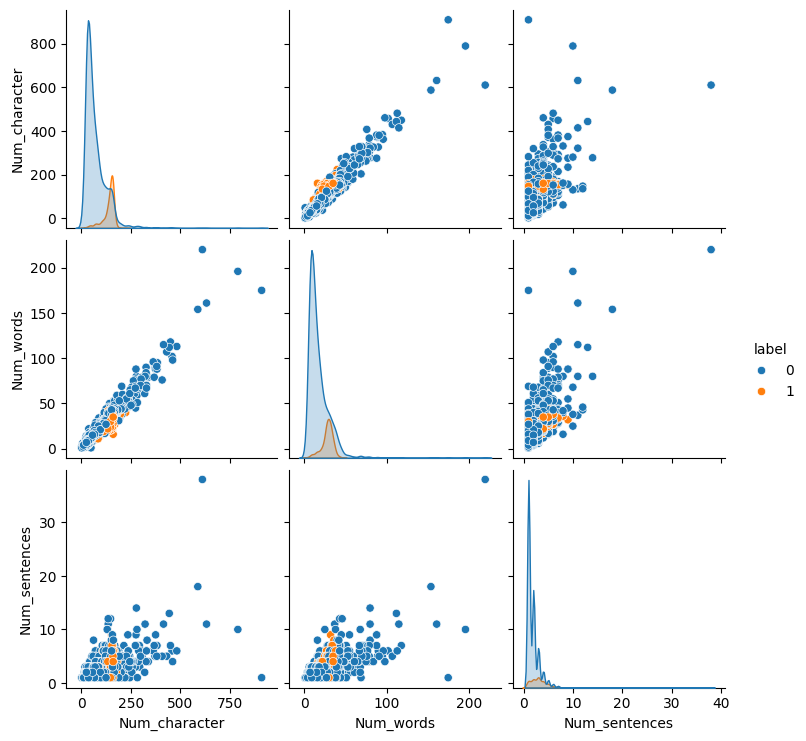

In [25]:
sns.pairplot(df,hue='label')

<Axes: >

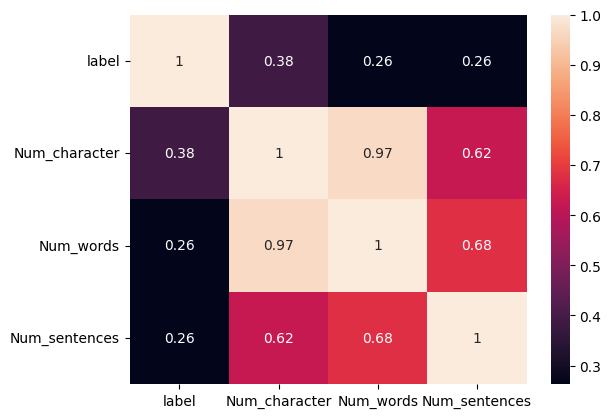

In [26]:
 
numeric_df = df.select_dtypes(include=[float, int])
sns.heatmap(numeric_df.corr(), annot=True)

3. # Data preprocessing
    Lower case -->
    tokenizing-->
    Romove special character-->
    Romove stop words and panctuation-->
    Stemming

In [27]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
       if i.isalnum():
         y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [30]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("Ok lar... Joking wif u oni...")

'ok lar... joking wif u oni...'

In [32]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [33]:
df['message']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5169, dtype: object

In [34]:
df['transform_text']=df['message'].apply(transform_text)
df.head()

,label,message,Num_character,Num_words,Num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


common word in message

In [35]:
from wordcloud import WordCloud
wc=WordCloud(width=400,height=400,min_font_size=10,background_color='black')

In [36]:
spam_wc=wc.generate(df[df['label']==1]['transform_text'].astype(str).str.cat(sep=" "))

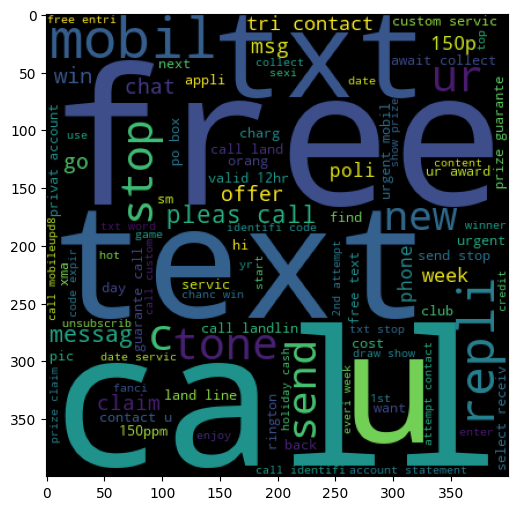

In [37]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [38]:
# ham_wc=wc.generate(df[df['label']==0]['transform_text'].str.cat(sep=" "))
ham_wc = wc.generate(df[df['label'] == 0]['transform_text'].fillna('').astype(str).str.cat(sep=" "))


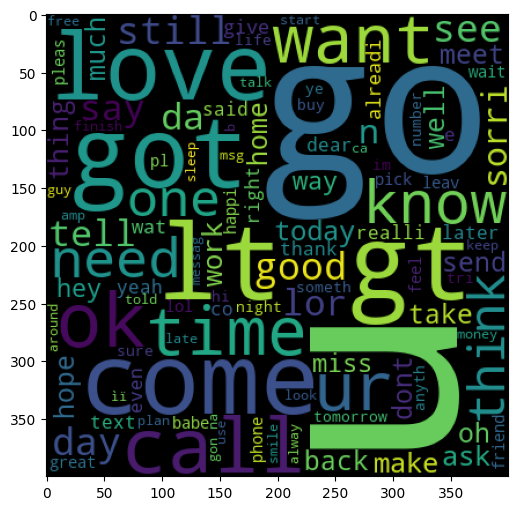

In [39]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [40]:
spam_corpus=[]
for msg in df[df['label']==1]['transform_text'].astype(str).tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [41]:
len(spam_corpus)

9939

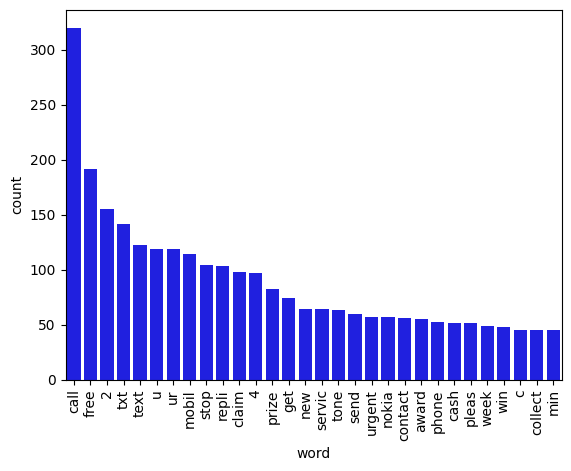

In [42]:
from collections import  Counter
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
word_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot using seaborn
sns.barplot(x='word', y='count', data=word_counts ,color='blue')
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

In [43]:
ham_corpus=[]
for msg in df[df['label']==0]['transform_text'].astype(str).tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [44]:
len(ham_corpus)

35404

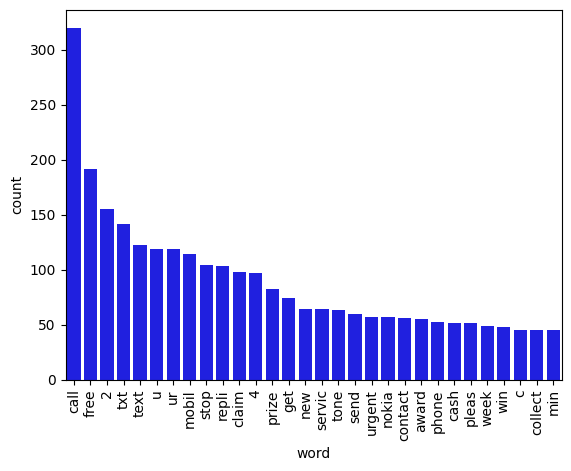

In [45]:
word_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=word_counts ,color='blue')
plt.xticks(rotation='vertical')
plt.show()

# 4.  Model Building

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
# cv=CountVectorizer()
Tfidf=TfidfVectorizer(max_features=3000)

In [47]:
X=Tfidf.fit_transform(df['transform_text']).toarray()

In [48]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# X=scaler.fit_transform(X)

In [49]:
# X=np.hstack((X,df['Num_character'].values.reshape(-1,1)))

In [50]:
# X.shape

In [51]:
Y=df['label'].values
Y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.2,random_state=2)

In [54]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [55]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [56]:
gnb.fit(X_train,Y_train)
Y_pred1=gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.8911992263056093
[[3275  356]
 [  94  411]]
0.5358539765319427


In [57]:
mnb.fit(X_train,Y_train)
Y_pred2=mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.9323017408123792
[[3631    0]
 [ 280  225]]
1.0


In [58]:
bnb.fit(X_train,Y_train)
Y_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9487427466150871
[[3626    5]
 [ 207  298]]
0.9834983498349835


In [59]:
# tfidf--->MNB

In [60]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgc=XGBClassifier(n_estimators=50,random_state=2)


In [61]:
clfs={
    'svc':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'Bgc':bc,
    'ETC':etc,
    'GBDT':gbc,
    'xgc':xgc
}

In [62]:
def train_classifier (clf,X_train,Y_train,X_text,Y_test):
    clf.fit(X_train,Y_train)
    Y_pred=clf.predict(X_test)
    accuracy=accuracy_score(Y_test,Y_pred)
    precision=precision_score(Y_test,Y_pred)

    return accuracy,precision
    

In [63]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.9605899419729207, 0.9453125)

In [64]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,Y_train,X_test,Y_test)

    print("for",name)
    print("Accuracy",current_accuracy)
    print("precision",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for svc
Accuracy 0.9605899419729207
precision 0.9453125
for KN
Accuracy 0.886605415860735
precision 1.0
for NB
Accuracy 0.9323017408123792
precision 1.0
for DT
Accuracy 0.9315764023210832
precision 0.7775
for LR
Accuracy 0.9243230174081238
precision 0.8664122137404581
for RF
Accuracy 0.9572050290135397
precision 0.985207100591716
for AdaBoost
Accuracy 0.9303675048355899
precision 0.7877984084880637
for Bgc
Accuracy 0.938588007736944
precision 0.7770419426048565
for ETC
Accuracy 0.9637330754352031
precision 0.958656330749354
for GBDT
Accuracy 0.9373791102514507
precision 0.8090452261306532
for xgc
Accuracy 0.9436653771760155
precision 0.7943722943722944


In [65]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'precision':precision_scores}).sort_values('precision',ascending=False)
performance_df

,Algorithm,Accuracy,precision
1,KN,0.886605,1.000000
2,NB,0.932302,1.000000
5,RF,0.957205,0.985207
8,ETC,0.963733,0.958656
0,svc,0.960590,0.945312
4,LR,0.924323,0.866412
9,GBDT,0.937379,0.809045
10,xgc,0.943665,0.794372
6,AdaBoost,0.930368,0.787798
3,DT,0.931576,0.777500


In [66]:
performance_df1=pd.melt(performance_df,id_vars='Algorithm')
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.886605
1,NB,Accuracy,0.932302
2,RF,Accuracy,0.957205
3,ETC,Accuracy,0.963733
4,svc,Accuracy,0.960590
5,LR,Accuracy,0.924323
6,GBDT,Accuracy,0.937379
7,xgc,Accuracy,0.943665
8,AdaBoost,Accuracy,0.930368
9,DT,Accuracy,0.931576


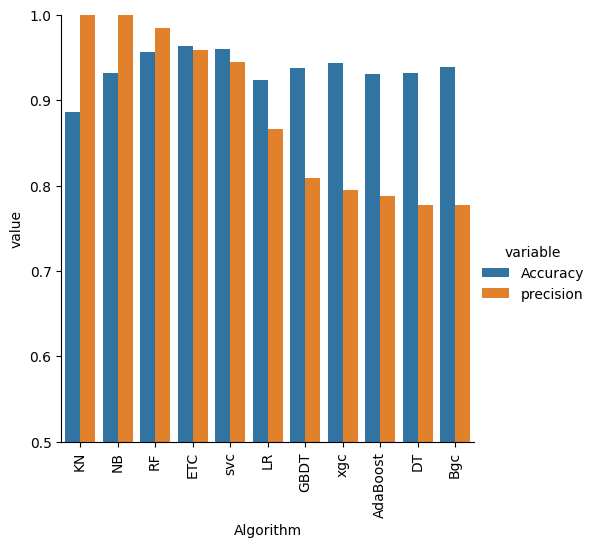

In [67]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [68]:
temp_df1=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [69]:
# temp_df2=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores})

In [70]:
# temp_df3=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=True)

In [71]:
new_df=performance_df.merge(temp_df1,on='Algorithm')

In [72]:
# new_df_scaled=new_df.merge(temp_df3,on='Algorithm')

In [73]:
new_df

,Algorithm,Accuracy,precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.886605,1.000000,0.886605,1.000000
1,NB,0.932302,1.000000,0.932302,1.000000
2,RF,0.957205,0.985207,0.957205,0.985207
3,ETC,0.963733,0.958656,0.963733,0.958656
4,svc,0.960590,0.945312,0.960590,0.945312
5,LR,0.924323,0.866412,0.924323,0.866412
6,GBDT,0.937379,0.809045,0.937379,0.809045
7,xgc,0.943665,0.794372,0.943665,0.794372
8,AdaBoost,0.930368,0.787798,0.930368,0.787798
9,DT,0.931576,0.777500,0.931576,0.777500


In [74]:
 #Applying stacking

In [75]:
estimators=[('SVM',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [76]:
from sklearn.ensemble import StackingClassifier

In [77]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [78]:
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)
print("accuracy",accuracy_score(Y_test,Y_pred))
print("Precision",precision_score(Y_test,Y_pred))

accuracy 0.9750967117988395
Precision 0.9085365853658537


In [79]:
import pickle
pickle.dump(Tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))